In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Import dataset

In [2]:
PATH = "../data/raw/get_around_pricing_project.csv"
df = pd.read_csv(PATH)

TARGET = "rental_price_per_day"

In [3]:
df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
df.shape

(4843, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [6]:
df.describe(include="all")

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


## Vue générale

In [7]:
# Nombre de  valeurs manquantes
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [8]:
# Pourcentage de valeurs manquantes
valeurs_manquantes_pourcent = (df.isna().sum() / df.shape[0]) * 100
valeurs_manquantes_pourcent

Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

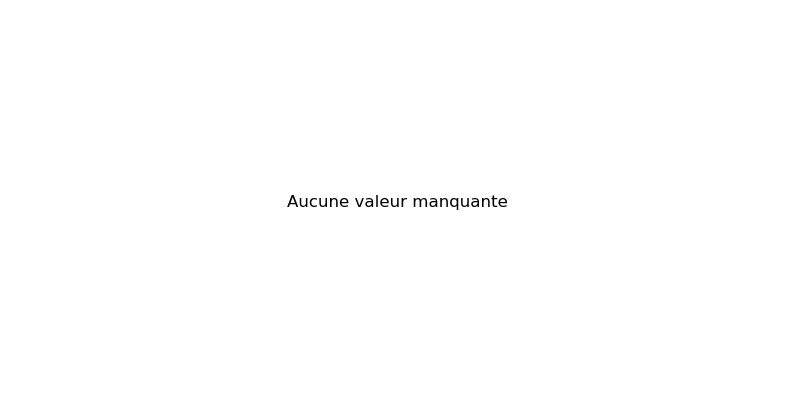

In [9]:
valeurs_manquantes_graph = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Prise en charge si valeurs manquetes à 0
if valeurs_manquantes_graph.empty:
    ax = plt.gca()
    ax.text(0.5, 0.5, "Aucune valeur manquante",
            ha="center", va="center", fontsize=12)
    ax.axis("off")
else:
    valeurs_manquantes_graph.plot(kind="bar")
    plt.title("Valeurs manquantes par colonne")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.xticks(rotation=45, ha="right")

plt.show()

In [10]:
# Duplicats
print("duplicates rows:", df.duplicated().sum())

# Checks qualité
print("mileage < 0:", (df["mileage"] < 0).sum())
print("engine_power == 0:", (df["engine_power"] == 0).sum())
print("price min/max:", df[TARGET].min(), df[TARGET].max())

duplicates rows: 0
mileage < 0: 1
engine_power == 0: 1
price min/max: 10 422


# EDA

## Target (prix/jour) : distribution + outliers + log

In [11]:
fig = px.histogram(df, x=TARGET, nbins=70, title="Distribution du prix / jour")
fig.show()

fig = px.box(df, y=TARGET, points="outliers", title="Outliers du prix / jour")
fig.show()

# Vue quantiles (utile pour décider cap/log)
q = df[TARGET].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99]).to_frame("price").T
display(q)

# Option : log transform (souvent utile si asymétrie)
df["log_price"] = np.log1p(df[TARGET])
fig = px.histogram(df, x="log_price", nbins=70, title="Distribution log1p(prix/jour)")
fig.show()


,0.01,0.05,0.25,0.50,0.75,0.95,0.99
price,28.0,70.0,104.0,119.0,136.0,182.0,216.0


## Valeurs Numériques (mileage, engine_power)

In [12]:
for col in ["mileage", "engine_power"]:
    fig = px.histogram(df, x=col, nbins=70, title=f"Distribution de {col}")
    fig.show()
    fig = px.box(df, y=col, points="outliers", title=f"Outliers de {col}")
    fig.show()

# Quantiles num (aide pour cap outliers)
display(df[["mileage","engine_power"]].quantile([0.01,0.05,0.5,0.95,0.99]).T)

,0.01,0.05,0.50,0.95,0.99
mileage,17759.24,46973.1,141080.0,233617.1,320967.02
engine_power,85.00,85.0,120.0,210.0,240.00


## Valeurs booléennes (taux d’équipement)


In [13]:
bool_cols = df.select_dtypes(include=["bool"]).columns.tolist()
share = (df[bool_cols].mean()*100).sort_values(ascending=False).round(1)
display(share.to_frame("% True"))

fig = px.bar(share.reset_index(), x="index", y=0, title="Part d'équipements (% True)")
fig.update_layout(xaxis_title="", yaxis_title="% True")
fig.show()

,% True
winter_tires,93.2
has_gps,79.3
private_parking_available,55.0
has_getaround_connect,46.0
has_speed_regulator,24.1
has_air_conditioning,20.2
automatic_car,19.9


## Valeurs catégorielles

In [14]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
card = df[cat_cols].nunique().sort_values(ascending=False)
display(card.to_frame("n_unique"))

for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(15).reset_index()
    vc.columns = [col, "count"]
    fig = px.bar(vc, x=col, y="count", title=f"Top modalités - {col}")
    fig.show()


,n_unique
model_key,28
paint_color,10
car_type,8
fuel,4


## Analyse vivariée

### Prix vs numériques

In [15]:
for col in ["mileage", "engine_power"]:
    fig = px.scatter(df, x=col, y=TARGET, opacity=0.35, title=f"{TARGET} vs {col}")
    fig.show()


### Prix vs catégories / options

In [16]:
# Catégories
for col in ["fuel", "car_type", "paint_color", "model_key"]:
    stats = (df.groupby(col)[TARGET].median()
               .sort_values(ascending=False)
               .reset_index())
    fig = px.bar(stats.head(20), x=col, y=TARGET, title=f"Prix médian par {col} (top 20)")
    fig.show()

# Booléens (options)
for col in bool_cols:
    stats = df.groupby(col)[TARGET].median().reset_index()
    stats[col] = stats[col].map({True:"True", False:"False"})
    fig = px.bar(stats, x=col, y=TARGET, title=f"Prix médian - {col}")
    fig.show()
